In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in datasets
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1854_2019.nc')
cmap_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/cmap.precip.mon.mean.1979_2018.nc')

In [3]:
#define variables
precip = cmap_ds.precip
sst = ersst_ds.sst

In [4]:
#Calculate ersst Nino3.4 index (Not normalised, just anom)
nino_region = sst.sel(lat=slice(5,-5), lon=slice(190,240))
nino_clim = nino_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
nino_anom = (nino_region - nino_clim).mean(dim='lat').mean(dim='lon')

In [5]:
#Make datasets the same size
nino34 = nino_anom.sel(time=slice('1979-01', '2018-12'))

In [6]:
seasonyear = (precip.time.dt.year + (precip.time.dt.month//12))
precip.coords['seasonyear'] = seasonyear
seasonyear2 = (nino34.time.dt.year + (nino34.time.dt.month//12))
nino34.coords['seasonyear'] = seasonyear2

In [7]:
def seasonal_mean(data):
    return data.groupby('time.season').mean()

In [8]:
yearly_seasonal_precip = precip.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_nino34 = nino34.groupby('seasonyear').apply(seasonal_mean)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [9]:
#Select DJF seasonal average
nino34_djf = yearly_seasonal_nino34.sel(season='DJF')
precip_djf = yearly_seasonal_precip.sel(season='DJF')

#Find el nino and la nina years
elnino = nino34_djf.where(nino34_djf > 0.5, drop = True)
lanina = nino34_djf.where(nino34_djf < -0.5, drop = True)
neutral = nino34_djf.where((nino34_djf > -0.5) & (nino34_djf < 0.5), drop = True)

#Find respective rainfall response
nino_pattern = precip_djf.where(precip_djf.seasonyear.isin(elnino.seasonyear.values), drop = True).mean(dim='seasonyear')
nina_pattern = precip_djf.where(precip_djf.seasonyear.isin(lanina.seasonyear.values), drop = True).mean(dim='seasonyear')
neutral_pattern = precip_djf.where(precip_djf.seasonyear.isin(neutral.seasonyear.values), drop = True).mean(dim='seasonyear')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


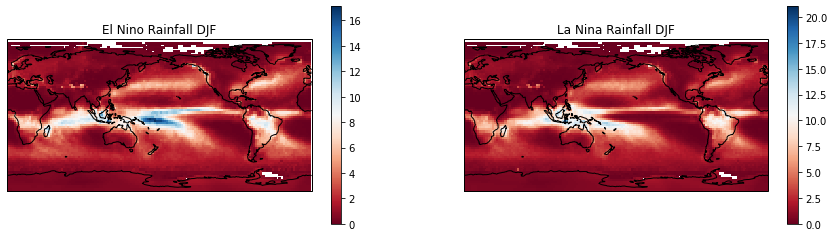

In [10]:
#Plot rainfall response
f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nino_pattern.lon, nino_pattern.lat, nino_pattern, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('El Nino Rainfall DJF')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nina_pattern.lon, nina_pattern.lat, nina_pattern, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('La Nina Rainfall DJF')

f.set_figwidth(15)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


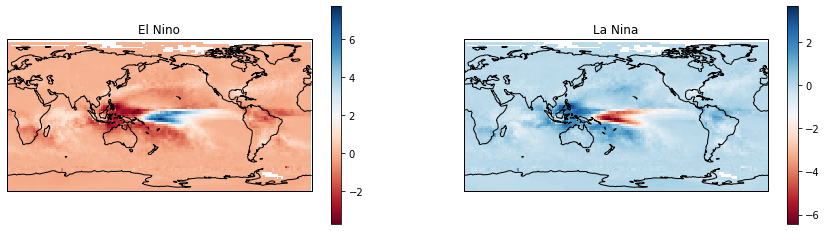

In [11]:
mean = precip_djf.mean(dim='seasonyear')

nino_dif = nino_pattern - mean
nina_dif = nina_pattern - mean

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nino_dif.lon, nino_dif.lat, nino_dif, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('El Nino')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nina_dif.lon, nina_dif.lat, nina_dif, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('La Nina')

f.set_figwidth(15)

 ### Repeat above for post 1950 with nino3.4 threshold set to 1 and -1 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


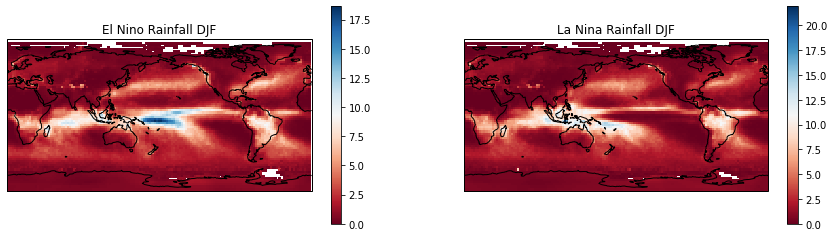

In [12]:
nino34_djf_post_1950 = yearly_seasonal_nino34.sel(season='DJF').sel(seasonyear=slice(1950,2016))
precip_djf_post_1950 = yearly_seasonal_precip.sel(season='DJF').sel(seasonyear=slice(1950,2016))

elnino2 = nino34_djf_post_1950.where(nino34_djf_post_1950 > 1, drop = True)
lanina2 = nino34_djf_post_1950.where(nino34_djf_post_1950 < -1, drop = True)

nino_pattern2 = precip_djf_post_1950.where(precip_djf_post_1950.seasonyear.isin(elnino2.seasonyear.values), drop = True).mean(dim='seasonyear')
nina_pattern2 = precip_djf_post_1950.where(precip_djf_post_1950.seasonyear.isin(lanina2.seasonyear.values), drop = True).mean(dim='seasonyear')

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nino_pattern2.lon, nino_pattern2.lat, nino_pattern2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('El Nino Rainfall DJF')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nina_pattern2.lon, nina_pattern2.lat, nina_pattern2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('La Nina Rainfall DJF')

f.set_figwidth(15)